## 0. Setup

Heart disease is one of the leading causes of mortality worldwide, accounting for millions of deaths each year. Early identification of patients at high risk plays a critical role in improving clinical outcomes and optimizing healthcare resources. Predictive models based on patient clinical data can support medical decision-making by estimating the probability of disease presence before severe symptoms appear.

In this laboratory, a binary logistic regression model is implemented from scratch using NumPy to predict the presence of heart disease based on several clinical features such as age, cholesterol levels, blood pressure, maximum heart rate, and electrocardiographic indicators. This project focuses on understanding the mathematical foundations of logistic regression, including the sigmoid function, cost optimization, and gradient descent.


In [446]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [447]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Load and prepare the dataset with Pandas

The dataset used in this project was obtained from Kaggle's Heart Disease Dataset, which contains patient records and 14 clinical features related to cardiovascular health. The target variable indicates the presence (1) or absence (0) of heart disease.

First, let's look at the dataset information:

In [448]:
import pandas as pd
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Before training, all numerical features are normalized to ensure comparable scales and stable gradient descent convergence. 

In [449]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


### 0.1 Basic exploratory data analysis (EDA)

Before training any model, it is essential to understand the characteristics of the dataset.
EDA ensures that the data is clean, reliable, and ready for the next steps:

- Dataset has 270 samples and 14 columns

- All columns have no missing values


In [450]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

This function it's a very useful method that gives us a concise summary of a DataFrame, for example the type.

In [451]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


This function gives us descriptive statistics for the numerical columns:
-  The dataset includes adult patients aged 29 to 77 years, with an average age of 54 years, which is a relevant risk factor for heart disease.
- Most patients are male, suggesting a gender imbalance that may affect disease prevalence and model training.

Check missing values

In [452]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [453]:
df.groupby(['Heart Disease']).Age.count()

Heart Disease
0    150
1    120
Name: Age, dtype: int64

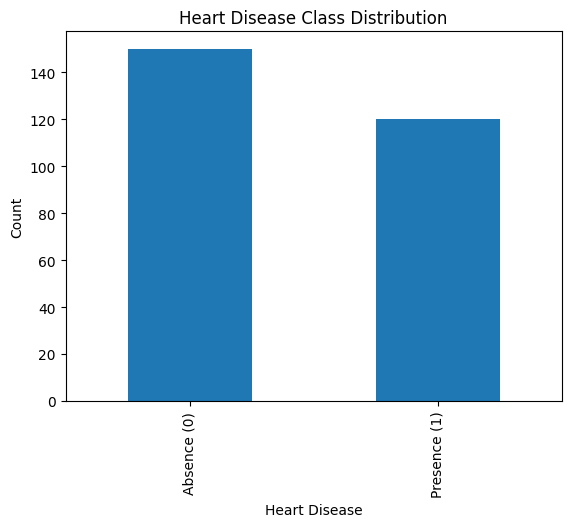

In [454]:
plt.figure()
df['Heart Disease'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Absence (0)', 'Presence (1)'])
plt.title('Heart Disease Class Distribution')
plt.ylabel('Count')
plt.show()

The target variable shows a slight imbalance: 56% of patients do not have heart disease (Absence) and 44% have heart disease (Presence).

### Outliers



We visualize numerical features using boxplots to inspect their distributions and identify potential outliers.

Logistic regression is sensitive to extreme values: Outliers can disproportionately influence the learned weights and negatively affect convergence. Visual inspection helps decide a preprocessing is needed.

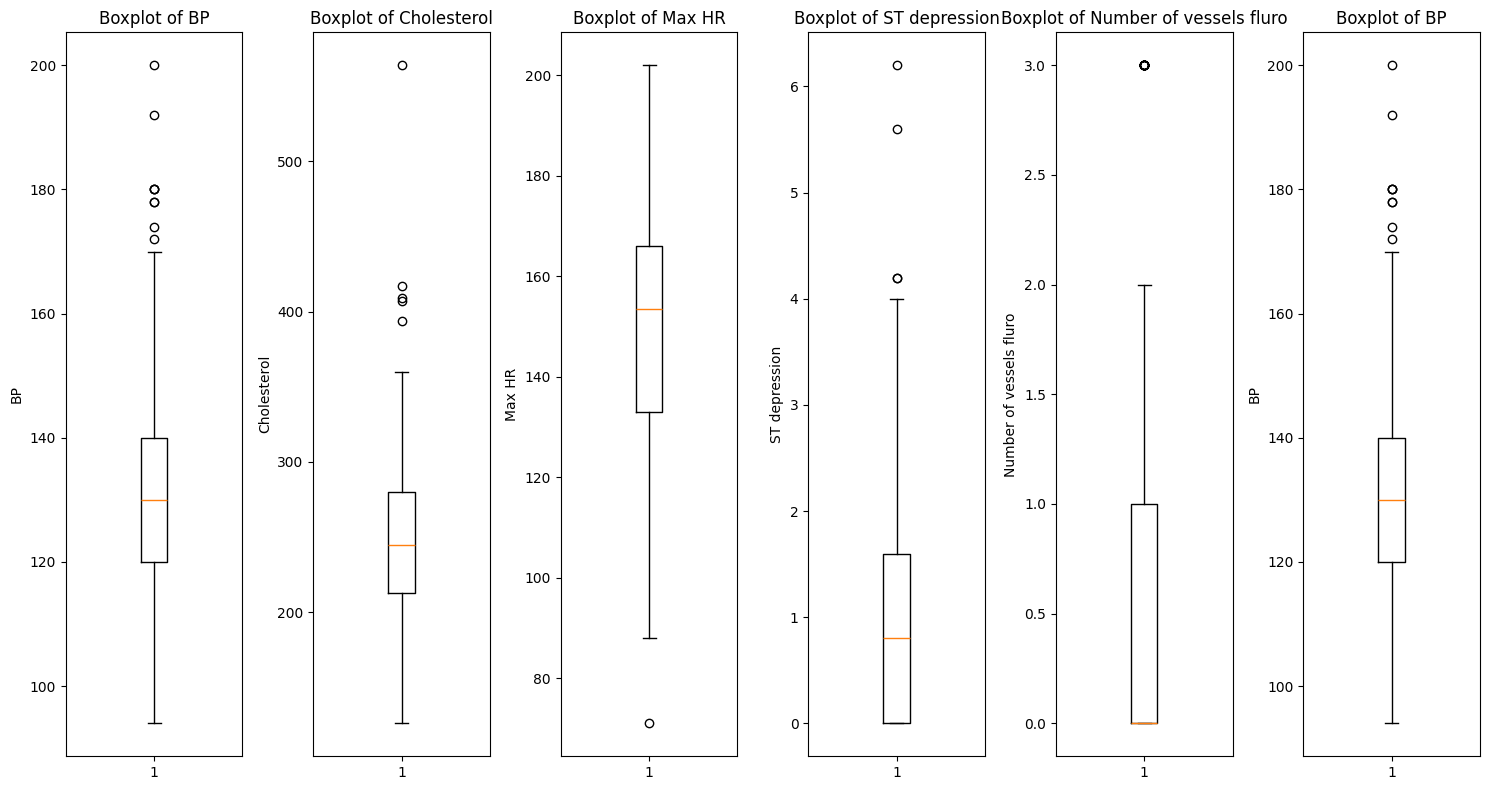

In [455]:
numeric_features = ['BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'BP']

plt.figure(figsize=(15, 8))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 6, i)
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


The boxplots reveal the presence of noticeable outliers across several numerical features.

### Preparation: 

We select a subset of relevant clinical features to build the input matrix X, while the target variable y represents the presence or absence of heart disease.
This selection helps reduce model complexity, improve interpretability, and focus the learning process on medically meaningful variables. 

In [456]:
features = ['Age', 'Sex', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']

X = df[features].values
y = df['Heart Disease'].values

### Stratified 70/30 Train/Test Split

We split the dataset into 70% training data and 30% testing data, preserving the original class distribution.

- Stratification is an analytical method that divides a heterogeneous dataset into more homogeneous subgroups based on specific characteristics: This is done to improve the accuracy of the model.

So, in theory:

- The training set is used to learn model parameters.

- The test set provides an unbiased evaluation of model performance.



In [457]:
# Set random seed for reproducibility
np.random.seed(42)

# Separate indices by class
class_0_idx = np.where(y == 0)[0]
class_1_idx = np.where(y == 1)[0]

# Shuffle indices
np.random.shuffle(class_0_idx)
np.random.shuffle(class_1_idx)

# 70/30 split
split_0 = int(0.7 * len(class_0_idx))
split_1 = int(0.7 * len(class_1_idx))

train_idx = np.concatenate([
    class_0_idx[:split_0],
    class_1_idx[:split_1]
])

test_idx = np.concatenate([
    class_0_idx[split_0:],
    class_1_idx[split_1:]
])

# Create train/test sets
X_train = X[train_idx]
y_train = y[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]

# Sanity check
print("Train disease rate:", y_train.mean())
print("Test disease rate:", y_test.mean())
print("Overall disease rate:", y.mean())



Train disease rate: 0.4444444444444444
Test disease rate: 0.4444444444444444
Overall disease rate: 0.4444444444444444


In [458]:
# stratified 70/30 split
X_train, y_train
X_test, y_test


(array([[4.40e+01, 1.00e+00, 2.35e+02, 1.40e+02, 1.80e+02, 0.00e+00,
         0.00e+00],
        [5.20e+01, 1.00e+00, 2.98e+02, 1.52e+02, 1.78e+02, 1.20e+00,
         0.00e+00],
        [5.30e+01, 1.00e+00, 2.46e+02, 1.30e+02, 1.73e+02, 0.00e+00,
         3.00e+00],
        [7.40e+01, 0.00e+00, 2.69e+02, 1.20e+02, 1.21e+02, 2.00e-01,
         1.00e+00],
        [4.20e+01, 1.00e+00, 2.95e+02, 1.20e+02, 1.62e+02, 0.00e+00,
         0.00e+00],
        [6.60e+01, 1.00e+00, 3.02e+02, 1.20e+02, 1.51e+02, 4.00e-01,
         0.00e+00],
        [4.10e+01, 1.00e+00, 2.03e+02, 1.35e+02, 1.32e+02, 0.00e+00,
         0.00e+00],
        [6.20e+01, 1.00e+00, 2.08e+02, 1.28e+02, 1.40e+02, 0.00e+00,
         0.00e+00],
        [3.70e+01, 1.00e+00, 2.50e+02, 1.30e+02, 1.87e+02, 3.50e+00,
         0.00e+00],
        [5.60e+01, 1.00e+00, 2.36e+02, 1.20e+02, 1.78e+02, 8.00e-01,
         0.00e+00],
        [5.10e+01, 1.00e+00, 1.75e+02, 1.10e+02, 1.23e+02, 6.00e-01,
         0.00e+00],
        [4.10e+01, 1.

#### Normalization

Gradient Descent converges faster and more reliably when features are on similar scales. Without normalization, variables like cholesterol could dominate the learning process simply due to their magnitude rather than their predictive power.


Like we saw in outliers: The presence of outliers further amplifies this problem by increasing gradient variance and slowing or destabilizing convergence, thats why normalization allows the model to learn from these cases without letting them disproportionately influence training.

We normalize numerical features so that they have comparable scales: so that each feature contributes equally, preventing a single feature from dominating due to its scale.


$$
x_{\text{norm}} = \frac{x - \mu}{\sigma}
$$


In [459]:
# Compute mean and standard deviation from training data only
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Avoid division by zero
X_std[X_std == 0] = 1

# Normalize
X_train_norm = (X_train - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std


In [460]:
# z-score normalization
X_train_norm
X_test_norm

array([[-1.13320139,  0.72401212, -0.22892308,  0.47851308,  1.33365614,
        -0.94196923, -0.70475712],
       [-0.24542911,  0.72401212,  0.95465794,  1.15722958,  1.24350556,
         0.13375394, -0.70475712],
       [-0.13445757,  0.72401212, -0.02226607, -0.08708399,  1.01812912,
        -0.94196923,  2.68166057],
       [ 2.19594467, -1.38119235,  0.40983493, -0.65268107, -1.32578585,
        -0.76268204,  0.42404878],
       [-1.35514446,  0.72401212,  0.89829694, -0.65268107,  0.52230096,
        -0.94196923, -0.70475712],
       [ 1.30817238,  0.72401212,  1.02980594, -0.65268107,  0.02647279,
        -0.58339484, -0.70475712],
       [-1.466116  ,  0.72401212, -0.83010709,  0.19571454, -0.82995768,
        -0.94196923, -0.70475712],
       [ 0.86428624,  0.72401212, -0.73617209, -0.20020341, -0.46935538,
        -0.94196923, -0.70475712],
       [-1.91000214,  0.72401212,  0.05288193, -0.08708399,  1.64918316,
         2.19555669, -0.70475712],
       [ 0.19845703,  0.7240

In [461]:
print("Train mean:", X_train_norm.mean(axis=0))
print("Train std:", X_train_norm.std(axis=0))


Train mean: [ 2.99877701e-16  4.71110511e-16 -1.24532953e-16  5.22803435e-16
  5.88007009e-16  2.91360117e-16  2.49065906e-16]
Train std: [1. 1. 1. 1. 1. 1. 1.]


In [462]:
print("Test mean:", X_test_norm.mean(axis=0))
print("Test std:", X_test_norm.std(axis=0))


Test mean: [ 0.08200542  0.15222819  0.15493477 -0.0368087  -0.11042253 -0.00237152
  0.17320302]
Test std: [1.02731874 0.9363681  0.88386421 1.02718901 1.13101364 1.08015115
 1.18986589]


Numerical features were normalized using Z-score standardization.
After normalization, training features have approximately zero mean and unit variance, confirming correct scaling.

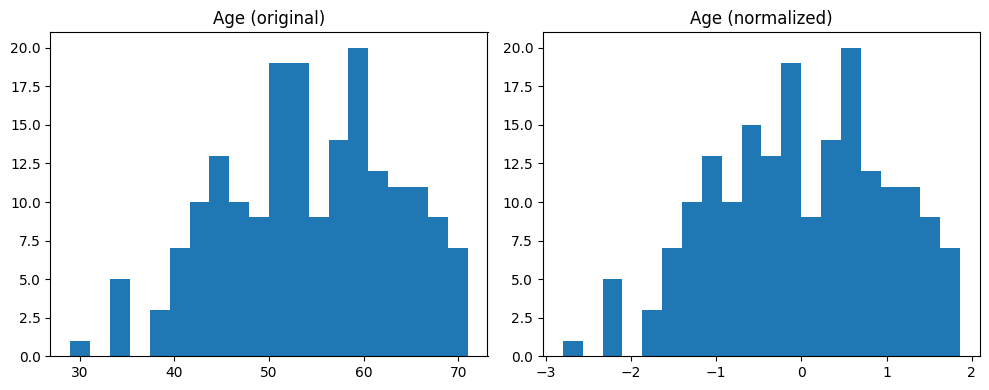

In [463]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X_train[:, 0], bins=20)
plt.title("Age (original)")

plt.subplot(1,2,2)
plt.hist(X_train_norm[:, 0], bins=20)
plt.title("Age (normalized)")

plt.tight_layout()
plt.show()

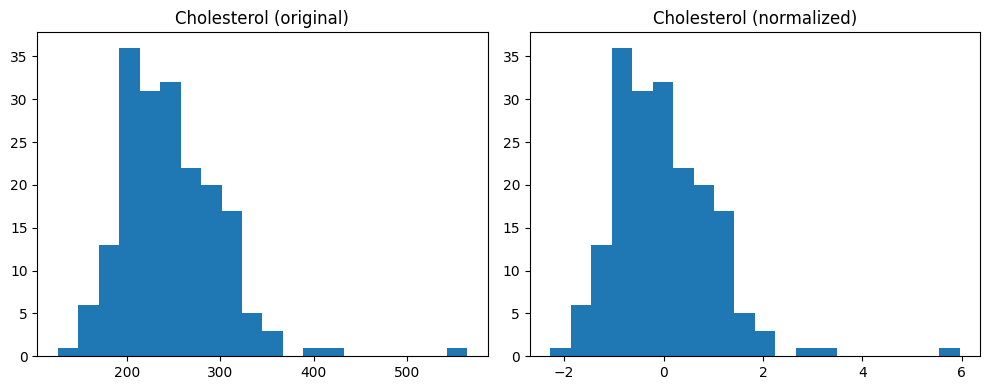

In [464]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X_train[:, 2], bins=20)
plt.title("Cholesterol (original)")

plt.subplot(1,2,2)
plt.hist(X_train_norm[:, 2], bins=20)
plt.title("Cholesterol (normalized)")

plt.tight_layout()
plt.show()

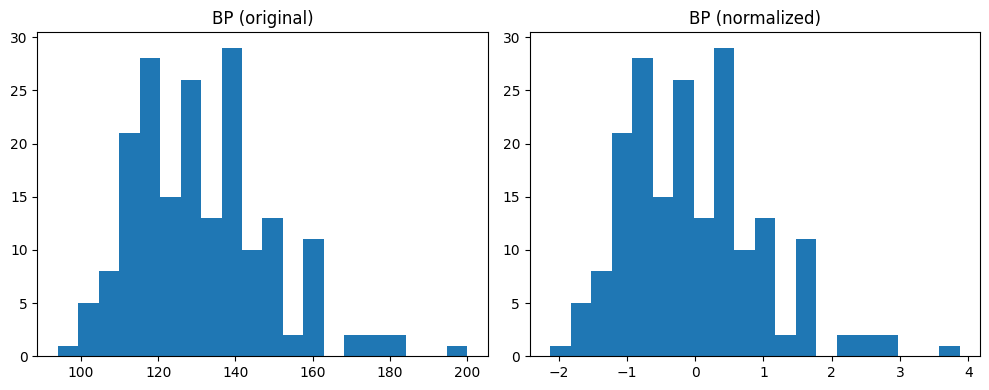

In [465]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X_train[:, 3], bins=20)
plt.title("BP (original)")

plt.subplot(1,2,2)
plt.hist(X_train_norm[:, 3], bins=20)
plt.title("BP (normalized)")

plt.tight_layout()
plt.show()

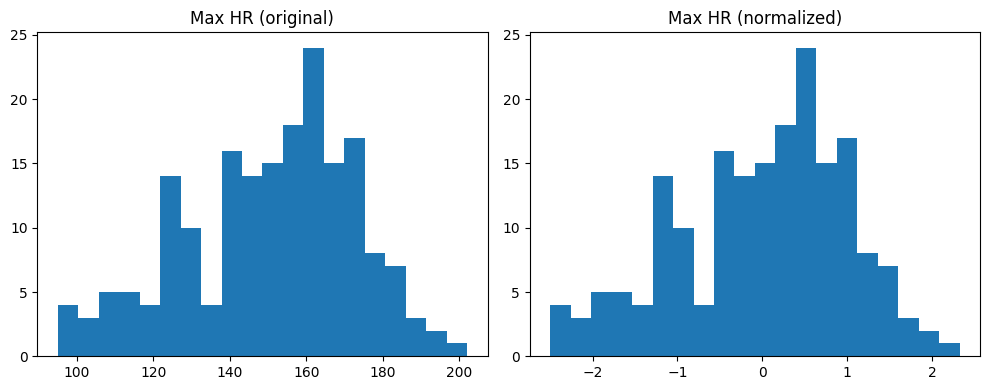

In [466]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X_train[:, 4], bins=20)
plt.title("Max HR (original)")

plt.subplot(1,2,2)
plt.hist(X_train_norm[:, 4], bins=20)
plt.title("Max HR (normalized)")

plt.tight_layout()
plt.show()

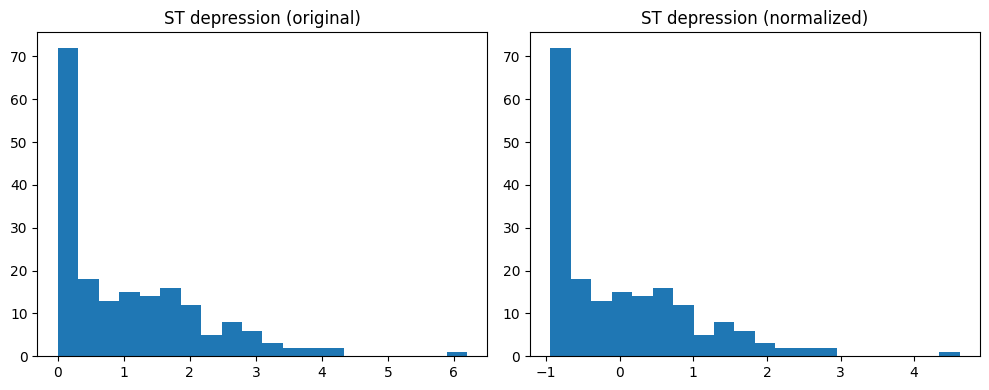

In [467]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(X_train[:, 5], bins=20)
plt.title("ST depression (original)")

plt.subplot(1,2,2)
plt.hist(X_train_norm[:, 5], bins=20)
plt.title("ST depression (normalized)")

plt.tight_layout()
plt.show()

## 2. Implement Basic Logistic Regression

To model the probability of heart disease presence, a binary logistic regression model is implemented from scratch using NumPy. Unlike linear regression, logistic regression applies the sigmoid function to a linear combination of the input features in order to map predictions to values between zero and one, which can be interpreted as probabilities.

 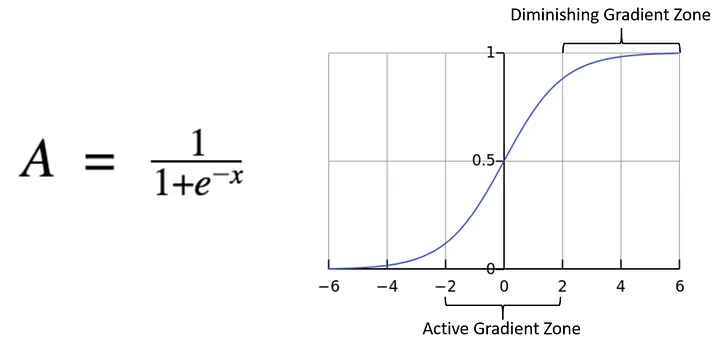

The sigmoid function is used to transform the linear output into a probabilistic prediction, while the binary cross-entropy loss function quantifies the discrepancy between predicted probabilities and true labels. This loss function penalizes confident but incorrect predictions more heavily, making it suitable for binary classification tasks.


In this step, we implement logistic regression using NumPy. The goal is to understand the core concepts: the sigmoid activation, the binary cross-entropy cost, gradient computation, and parameter updates via gradient descent. We first test our functions on a simple synthetic 2D linearly separable dataset to validate our implementation before moving on to real patient data.

In [468]:
def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1 / (1 + np.exp(-z))


In [469]:
def compute_cost(w, b, X, y):
    """Compute logistic regression cost J(w, b) using explicit model."""
    m, n = X.shape

    # For each example i: f_{w,b}^{(i)}(x^{(i)}) = sigmoid(w^T x^{(i)} + b)
    z = X @ w + b
    f = sigmoid(z)

    # To avoid log(0), clip probabilities
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J = -(1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    return J


# Quick test on linear dataset with zero parameters
m = 100  # number of examples
X_linear = np.random.randn(m, 2)

# Underlying "true" boundary: x2 = x1 + 0.5
# Label 1 if above the line, 0 if below
y_linear = (X_linear[:, 1] > X_linear[:, 0] + 0.5).astype(int)

w_test = np.zeros(2)
b_test = 0.0
J_test = compute_cost(w_test, b_test, X_linear, y_linear)
J_test

np.float64(0.6931471805599453)

In [470]:
def compute_gradient(w, b, X, y):
    """Compute gradients dJ/dw and dJ/db with explicit model."""
    m, n = X.shape

    # f_{w,b}^{(i)}(x^{(i)})
    z = X @ w + b
    f = sigmoid(z)

    error = f - y  # e^{(i)} = f_{w,b}^{(i)}(x^{(i)}) - y^{(i)}

    dj_dw = (1 / m) * (X.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db


# Quick test
dj_dw_test, dj_db_test = compute_gradient(w_test, b_test, X_linear, y_linear)
dj_dw_test, dj_db_test

(array([ 0.25612446, -0.28935144]), np.float64(0.12))

In [471]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=0):
    """Run gradient descent to optimize w and b."""
    w = w_init.copy()
    b = b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_history.append(J)

        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:4d}: J(w, b) = {J:.4f}")

    return w, b, J_history



### Pre test

Before applying logistic regression to real patient data, we first validate the implementation on a simple, 2D linearly separable dataset.


Initial cost: 0.6931471805599453
Initial gradient: [ 0.17861156 -0.32147308] 0.07
Iteration    0: J(w, b) = 0.6793
Iteration   50: J(w, b) = 0.3783
Iteration  100: J(w, b) = 0.2938
Iteration  150: J(w, b) = 0.2513
Iteration  199: J(w, b) = 0.2251


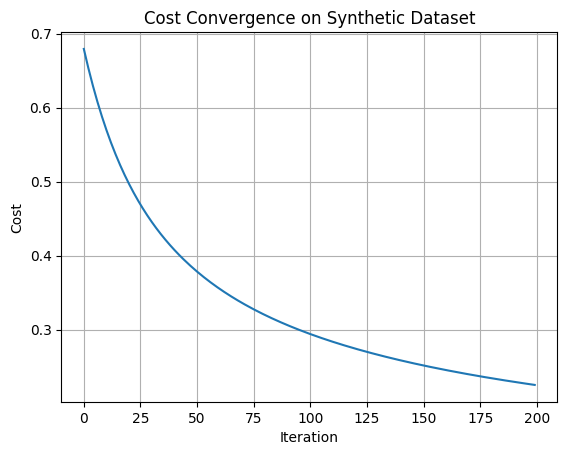

In [472]:
np.random.seed(42)
m = 100
X_linear = np.random.randn(m, 2)

y_linear = (X_linear[:, 1] > X_linear[:, 0] + 0.5).astype(int)

w_test = np.zeros(2)
b_test = 0.0

J_test = compute_cost(w_test, b_test, X_linear, y_linear)
print("Initial cost:", J_test)

dj_dw_test, dj_db_test = compute_gradient(w_test, b_test, X_linear, y_linear)
print("Initial gradient:", dj_dw_test, dj_db_test)

w_test_trained, b_test_trained, J_history_test = gradient_descent(X_linear, y_linear, w_test, b_test, alpha=0.1, num_iters=200, print_every=50)

# Plot cost
plt.plot(J_history_test)
plt.title("Cost Convergence on Synthetic Dataset")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


The synthetic dataset test confirms that:

- The cost function decreases over iterations, indicating proper gradient computation.

Our implementation is ready to be applied to real patient data, reducing the risk of errors when training on the full heart disease dataset.

### Now with real patient data 

In [473]:
# Set
w_init = np.zeros(X_train_norm.shape[1])
b_init = 0.0

alpha = 0.01
num_iters = 1500

# Train logistic regression
w_trained, b_trained, J_history = gradient_descent(X_train_norm, y_train, w_init, b_init, alpha, num_iters, print_every=100)

w_trained, b_trained


Iteration    0: J(w, b) = 0.6913
Iteration  100: J(w, b) = 0.5703
Iteration  200: J(w, b) = 0.5149
Iteration  300: J(w, b) = 0.4850
Iteration  400: J(w, b) = 0.4668
Iteration  500: J(w, b) = 0.4548
Iteration  600: J(w, b) = 0.4465
Iteration  700: J(w, b) = 0.4404
Iteration  800: J(w, b) = 0.4358
Iteration  900: J(w, b) = 0.4322
Iteration 1000: J(w, b) = 0.4294
Iteration 1100: J(w, b) = 0.4272
Iteration 1200: J(w, b) = 0.4253
Iteration 1300: J(w, b) = 0.4238
Iteration 1400: J(w, b) = 0.4226
Iteration 1499: J(w, b) = 0.4215


(array([-0.04177925,  0.84080602,  0.24504131,  0.12071455, -0.65649151,
         0.54468496,  0.84511103]),
 np.float64(-0.23872139537532974))

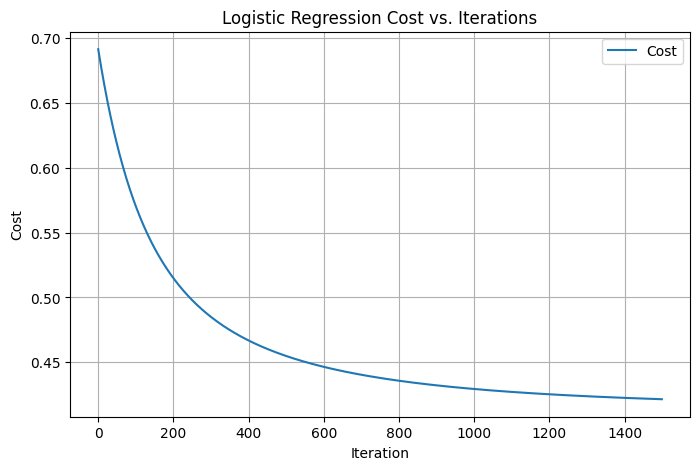

In [474]:
plt.figure(figsize=(8,5))
plt.plot(J_history, label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Logistic Regression Cost vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

Now we can use features such as support for prediction and metrics.

In [475]:
def predict(X, w, b, threshold=0.5):
    """Predict binary labels using learned logistic regression parameters."""
    probs = sigmoid(X @ w + b)
    return (probs >= threshold).astype(int)


In [476]:
def compute_metrics(y_true, y_pred):
    """Compute accuracy, precision, recall, and F1-score."""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return accuracy, precision, recall, f1

The logistic regression model trained using gradient descent shows clear convergence as observed in the decreasing cost function over iterations.




After training the logistic regression model, we will evaluate its performance using four key metrics: Accuracy, Precision, Recall, and F1-score. 

Each metric provides a different perspective on how well the model predicts heart disease.

- Accuracy: Measures the overall correctness of the model.

  Shows the proportion of all patients (both healthy and diseased) correctly classified.

- Precision (Positive Predictive Value): Measures how many of the patients predicted as diseased are actually diseased.

  Indicates reliability of positive predictions.

- Recall (Sensitivity or True Positive Rate): Measures how many of the actual diseased patients were correctly identified by the model.

  Shows the ability of the model to detect actual heart disease cases.

- F1 Score: Harmonic mean of Precision and Recall.

  Provides a single metric that balances Precision and Recall.

Summary:  
- Accuracy → general correctness  
- Precision → reliability of positive predictions  
- Recall → coverage of actual positives  
- F1 → balanced metric combining precision and recall  

By evaluating all four metrics, we get a comprehensive view of the model’s performance on both training and test sets.


In [477]:
# Predict
y_train_pred = predict(X_train_norm, w_trained, b_trained)
y_test_pred = predict(X_test_norm, w_trained, b_trained)

# Compute metrics
train_metrics = compute_metrics(y_train, y_train_pred)
test_metrics = compute_metrics(y_test, y_test_pred)

# Display metrics in a table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': train_metrics,
    'Test': test_metrics
})

print(metrics_df)


      Metric     Train      Test
0   Accuracy  0.820106  0.814815
1  Precision  0.812500  0.818182
2     Recall  0.773810  0.750000
3   F1 Score  0.792683  0.782609


The training accuracy and test accuracy are relatively close, indicating good generalization and no strong signs of overfitting.

Precision and recall are balanced on both datasets, suggesting that the model does not favor false positives or false negatives excessively.




### 3. Visualize Decision Boundaries

We select feature pairs based on clinical relevance and complementary behavior:

- Age and Cholesterol: Classic cardiovascular risk factors.

- Blood Pressure and Max Heart Rate: Reflects heart strain vs. cardiovascular fitness.

- ST Depression and Number of Vessels: Captures ECG stress response and anatomical vessel blockage.


In this step, we analyze how logistic regression separates patients with and without heart disease using only two features at a time. By reducing the feature space to two dimensions, we can visually inspect the learned decision boundary and better understand the model’s behavior and interpretability.


In [478]:
def plot_decision_boundary(X, y, w, b, feature_names):
    plt.figure(figsize=(6, 5))

    # Scatter plot
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c="tab:blue", label="No Disease", alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c="tab:red", label="Disease", alpha=0.7)

    # Data ranges
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    x_vals = np.linspace(x_min, x_max, 200)

    if abs(w[1]) < 1e-8:
        x_boundary = -b / (w[0] + 1e-8)
        plt.axvline(x=x_boundary, color="k", linestyle="--",
                    label="Decision Boundary")
    else:
        y_vals = -(w[0] * x_vals + b) / w[1]
        mask = (y_vals >= y_min) & (y_vals <= y_max)
        plt.plot(x_vals[mask], y_vals[mask],
                 "k--", label="Decision Boundary")

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f"Decision Boundary: {feature_names[0]} vs {feature_names[1]}")
    plt.legend()
    plt.grid(True)
    plt.show()


In [479]:
def train_2d_logistic_regression(X, y, alpha=0.01, num_iters=2000):
    w_init = np.zeros(2)
    b_init = 0.0
    w, b, J_history = gradient_descent(
        X, y, w_init, b_init, alpha, num_iters, print_every=100
    )
    return w, b

### 3.1 Age and Cholesterol

Iteration    0: J(w, b) = 0.6930
Iteration  100: J(w, b) = 0.6844
Iteration  200: J(w, b) = 0.6794
Iteration  300: J(w, b) = 0.6765
Iteration  400: J(w, b) = 0.6747
Iteration  500: J(w, b) = 0.6737
Iteration  600: J(w, b) = 0.6731
Iteration  700: J(w, b) = 0.6727
Iteration  800: J(w, b) = 0.6724
Iteration  900: J(w, b) = 0.6723
Iteration 1000: J(w, b) = 0.6722
Iteration 1100: J(w, b) = 0.6721
Iteration 1200: J(w, b) = 0.6721
Iteration 1300: J(w, b) = 0.6720
Iteration 1400: J(w, b) = 0.6720
Iteration 1500: J(w, b) = 0.6720
Iteration 1600: J(w, b) = 0.6720
Iteration 1700: J(w, b) = 0.6720
Iteration 1800: J(w, b) = 0.6720
Iteration 1900: J(w, b) = 0.6720
Iteration 1999: J(w, b) = 0.6720


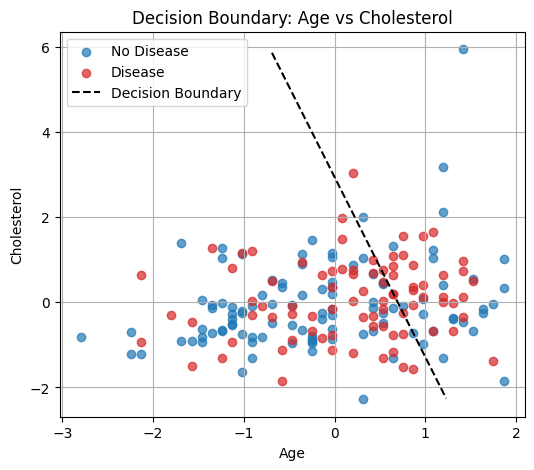

In [480]:
pair_1 = ['Age', 'Cholesterol']
idx_1 = [features.index(f) for f in pair_1]
 
X_pair_1 = X_train_norm[:, idx_1]
 
w_1, b_1 = train_2d_logistic_regression(X_pair_1, y_train)
plot_decision_boundary(X_pair_1, y_train, w_1, b_1, pair_1)

### 3.2 Blood Pressure and Max Heart Rate

Iteration    0: J(w, b) = 0.6926
Iteration  100: J(w, b) = 0.6534
Iteration  200: J(w, b) = 0.6298
Iteration  300: J(w, b) = 0.6152
Iteration  400: J(w, b) = 0.6059
Iteration  500: J(w, b) = 0.5999
Iteration  600: J(w, b) = 0.5960
Iteration  700: J(w, b) = 0.5933
Iteration  800: J(w, b) = 0.5915
Iteration  900: J(w, b) = 0.5902
Iteration 1000: J(w, b) = 0.5893
Iteration 1100: J(w, b) = 0.5887
Iteration 1200: J(w, b) = 0.5883
Iteration 1300: J(w, b) = 0.5880
Iteration 1400: J(w, b) = 0.5877
Iteration 1500: J(w, b) = 0.5876
Iteration 1600: J(w, b) = 0.5875
Iteration 1700: J(w, b) = 0.5874
Iteration 1800: J(w, b) = 0.5873
Iteration 1900: J(w, b) = 0.5873
Iteration 1999: J(w, b) = 0.5872


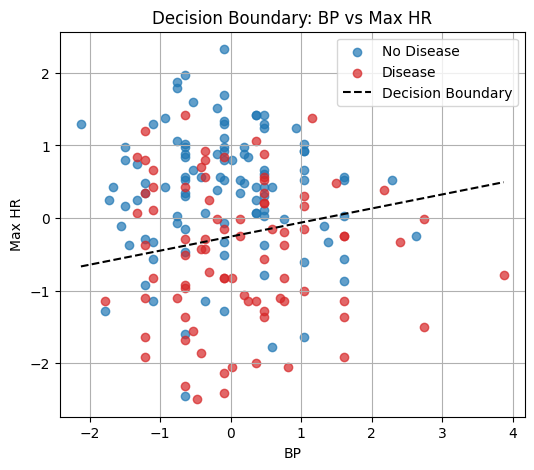

In [481]:
pair_2 = ['BP', 'Max HR']
idx_2 = [features.index(f) for f in pair_2]
 
X_pair_2 = X_train_norm[:, idx_2]
 
w_2, b_2 = train_2d_logistic_regression(X_pair_2, y_train)
plot_decision_boundary(X_pair_2, y_train, w_2, b_2, pair_2)

### 3.3 ST Depression and Number of Vessels

Iteration    0: J(w, b) = 0.6922
Iteration  100: J(w, b) = 0.6211
Iteration  200: J(w, b) = 0.5821
Iteration  300: J(w, b) = 0.5592
Iteration  400: J(w, b) = 0.5451
Iteration  500: J(w, b) = 0.5359
Iteration  600: J(w, b) = 0.5298
Iteration  700: J(w, b) = 0.5256
Iteration  800: J(w, b) = 0.5227
Iteration  900: J(w, b) = 0.5206
Iteration 1000: J(w, b) = 0.5191
Iteration 1100: J(w, b) = 0.5180
Iteration 1200: J(w, b) = 0.5172
Iteration 1300: J(w, b) = 0.5165
Iteration 1400: J(w, b) = 0.5161
Iteration 1500: J(w, b) = 0.5157
Iteration 1600: J(w, b) = 0.5155
Iteration 1700: J(w, b) = 0.5152
Iteration 1800: J(w, b) = 0.5151
Iteration 1900: J(w, b) = 0.5150
Iteration 1999: J(w, b) = 0.5149


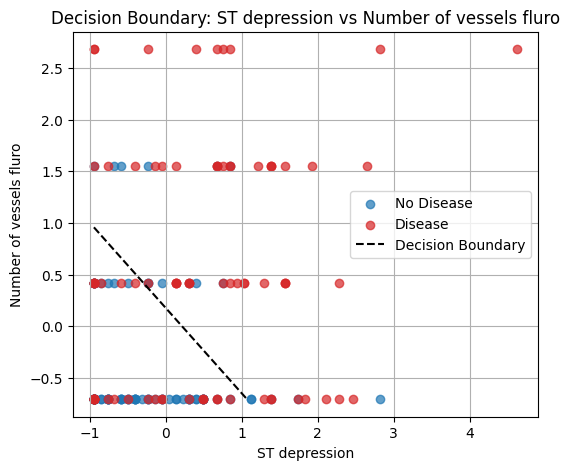

In [482]:
pair_3 = ['ST depression', 'Number of vessels fluro']
idx_3 = [features.index(f) for f in pair_3]

X_pair_3 = X_train_norm[:, idx_3]

w_3, b_3 = train_2d_logistic_regression(X_pair_3, y_train)
plot_decision_boundary(X_pair_3, y_train, w_3, b_3, pair_3)

 

### 3.4 Separability / Non Linearity

**Age vs. Cholesterol**  
In this case, no clear linear separation is observed. Data points from both classes are highly intermixed across the feature space, indicating that age and cholesterol alone are insufficient to distinguish between patients with and without heart disease.

**Blood Pressure vs. Max Heart Rate**  
This feature pair shows the most noticeable degree of separation among the three analyzed. The decision boundary captures a general trend where higher blood pressure combined with lower maximum heart rate is more associated with disease presence. However, several misclassified points remain, highlighting overlap between classes and limiting classification accuracy.

**ST Depression vs. Number of Vessels**  
For this pair, linear separability is particularly poor. The number of vessels is a discrete variable with only a few possible values, resulting in horizontally clustered data points, while ST depression values are unevenly distributed. This structure makes it difficult for a linear decision boundary to effectively separate the classes, and the resulting boundary may appear unintuitive or misleading.

Overall, this analysis demonstrates that while certain feature pairs exhibit partial linear separability, none are sufficient on their own for accurate classification. This motivates the use of multiple features simultaneously and the application of regularization.

## 4. Repeat with Regularization